In [107]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [108]:
import numpy as np
import matplotlib.pyplot as pl
from scipy import interpolate
import h5py
import qnm
from numpy import vectorize
from scipy.interpolate import interp1d
from scipy.optimize import minimize
from scipy.optimize import least_squares
pl.rc('figure', figsize=(6.1, 4.5))
pl.rcParams.update({'text.usetex': False,
                     'font.family': 'serif',
                     'font.serif': ['Georgia'],
                     'mathtext.fontset': 'cm',
                     'lines.linewidth': 2.5,
                     'font.size': 14,
                     'xtick.labelsize': 'medium',
                     'ytick.labelsize': 'medium',
                     'xtick.direction': 'in',
                     'ytick.direction': 'in',
                     'axes.labelsize': 'large',
                     'axes.titlesize': 'large',
                     'axes.grid': False,
                     'grid.alpha': 0.73,
                     'lines.markersize': 12,
                     'legend.borderpad': 0.2,
                     'legend.fancybox': True,
                     'legend.fontsize': 12,
                     'legend.framealpha': 0.7,
                     'legend.handletextpad': 0.5,
                     'legend.labelspacing': 0.2,
                     'legend.loc': 'best',
                     'savefig.dpi': 80,
                     'pdf.compression': 9})

In [109]:
t_unit=68.5*2950./2/299792458

In [110]:
def joinf(name):
    if name==1:
        suffix='_overtone'
        prefix=''
    elif name==2:
        suffix=''
        prefix=''
    elif name==3:
        suffix=''
        prefix='no_filter_'
        
    mtrue=68.5
    mass_max_overtone1=np.loadtxt('time_rest_new/'+prefix+'mass1'+suffix)
    spin_max_overtone1=np.loadtxt('time_rest_new/'+prefix+'spin1'+suffix)
    tinit_overtone1=np.loadtxt('time_rest_new/'+prefix+'tinit1'+suffix)
    epsilong_overtone1=np.sqrt(((mass_max_overtone1-mtrue)/mtrue)**2+(spin_max_overtone1-0.69)**2)
    
    mass_max_overtone2=np.loadtxt('time_rest_new/'+prefix+'mass2'+suffix)
    spin_max_overtone2=np.loadtxt('time_rest_new/'+prefix+'spin2'+suffix)
    tinit_overtone2=np.loadtxt('time_rest_new/'+prefix+'tinit2'+suffix)
    epsilong_overtone2=np.sqrt(((mass_max_overtone2-mtrue)/mtrue)**2+(spin_max_overtone2-0.69)**2)
    
    mass_max_overtone3=np.loadtxt('time_rest_new/'+prefix+'mass3'+suffix)
    spin_max_overtone3=np.loadtxt('time_rest_new/'+prefix+'spin3'+suffix)
    tinit_overtone3=np.loadtxt('time_rest_new/'+prefix+'tinit3'+suffix)
    epsilong_overtone3=np.sqrt(((mass_max_overtone3-mtrue)/mtrue)**2+(spin_max_overtone3-0.69)**2)
    
    epsilong_overtone_join=np.concatenate((epsilong_overtone1,epsilong_overtone2,epsilong_overtone3))
    tinit_overtone_join=np.concatenate((tinit_overtone1,tinit_overtone2,tinit_overtone3))
    mass_overtone_join=np.concatenate((mass_max_overtone1,mass_max_overtone2,mass_max_overtone3))
    return epsilong_overtone_join,tinit_overtone_join,mass_overtone_join

In [111]:
epsilong_overtone_join,tinit_overtone_join,mass_overtone_join=joinf(1)

In [112]:
epsilong_join,tinit_join,mass_join=joinf(2)

In [148]:
# mean_mass=(34+240)/2
# mean_spin=(0.1+0.95)/2
# mean_epsilong=np.sqrt(((240-68.5)/68.5)**2+(0.1-0.692085186818)**2)

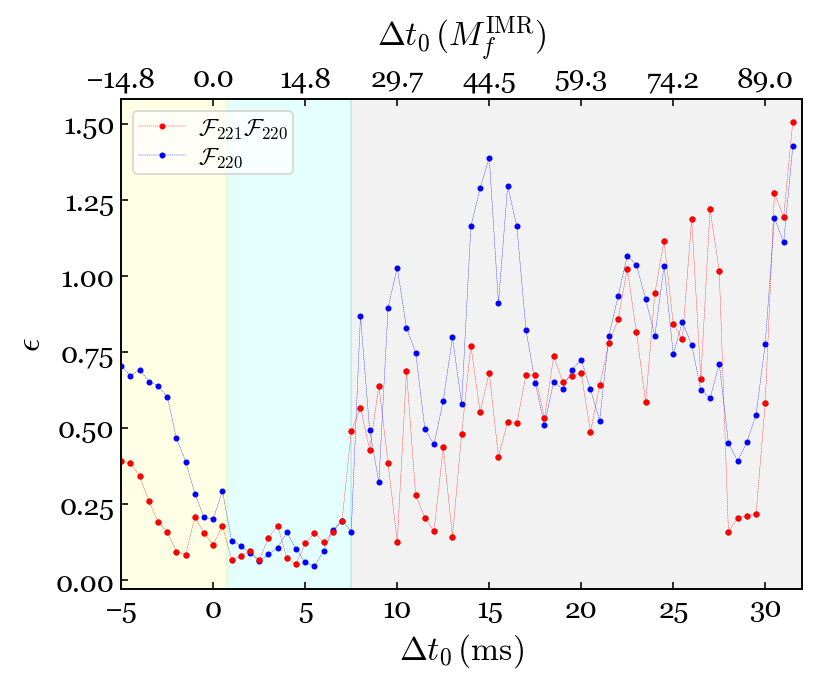

In [149]:
fig = pl.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()

ax1.plot(tinit_overtone_join,epsilong_overtone_join,'--', marker='o',ms=2,lw=0.2,color='r',label=r'$\mathcal{F}_{221}\mathcal{F}_{220}$')

ax1.plot(tinit_join,epsilong_join,'--', marker='o',ms=2,lw=0.2,color='b',label=r'$\mathcal{F}_{220}$')
ax1.axvspan(7.5, 32, alpha=0.1, color='grey')
ax1.axvspan(0.77, 7.5, alpha=0.1, color='cyan')
ax1.axvspan(-5, 0.77, alpha=0.1, color='yellow')

ax1.xaxis.set_ticks(np.arange(-5, 35, 5))
ax2.plot(tinit_overtone_join/t_unit*1e-3,epsilong_overtone_join,'o',ms=2,color='r')
ax2.xaxis.set_ticks(np.arange(-5, 35, 5)/t_unit*1e-3)
ax1.set_xlim(-5,32)
ax2.set_xlim(-5/t_unit*1e-3,32/t_unit*1e-3)
ax1.set_xlabel(r'$\Delta t_0\, ({\rm ms})$')
ax2.set_xlabel(r'$\Delta t_0\, (M_f^{\rm IMR})$',labelpad=10)
ax1.set_ylabel(r'$\epsilon$')

# ax1.axhline(y=mean_epsilong,ls='--',color='k',lw=1.2,label='prior')
# pl.axhline(y=0.69,lw=1)
ax1.legend(loc='upper left')
pl.savefig('GW150914_likelihood_time.pdf',bbox_inches='tight')

In [115]:
# np.savetxt('time_rest/epsilong_overtone_join',epsilong_overtone_join)
# np.savetxt('time_rest/tinit_overtone_join',tinit_overtone_join)

# np.savetxt('time_rest/epsilong_join',epsilong_join)
# np.savetxt('time_rest/tinit_join',tinit_join)